# Exploratory Data Analysis

### Lets import the libraries that we are going to need.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps

#This are the packages we will use for manipulating dates on our table.
from datetime import datetime
from dateutil.relativedelta import relativedelta

# This are the packages that we will use for creating our graphs.
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

from mpl_toolkits.mplot3d import Axes3D

from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

### Lets take a look at our dataset

In [2]:
df = pd.read_csv('athletes.csv')
df = df.dropna()
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [3]:
df.shape

(10858, 11)

## Whats the age distribution among athletes?

step 1) Convert the 'dob' field into a datetime object.

step 2) Extract the age.

step 3) Generate graph.

### Lets start with step (1). Convert 'dob' into a datetime object.

In [4]:
# Example
datetime.strptime('09/07/86', '%m/%d/%y')

datetime.datetime(1986, 9, 7, 0, 0)

### Lets test this on the entire column.

In [5]:
df.apply(lambda x: datetime.strptime(x['dob'], '%m/%d/%y'), 1).sort_values()

5161    1969-01-01
11015   1969-01-02
3070    1969-01-23
8146    1969-02-01
9110    1969-02-04
8971    1969-02-12
2729    1969-02-17
4041    1969-03-20
4404    1969-07-21
5347    1969-07-31
4031    1969-08-05
10063   1969-08-24
1844    1969-08-25
5316    1969-09-23
0       1969-10-17
10458   1969-11-08
10615   1969-11-13
7357    1969-12-26
3729    1970-01-11
10911   1970-02-28
2814    1970-03-04
848     1970-04-05
11277   1970-08-24
5856    1970-08-31
6374    1970-10-11
9571    1970-10-26
354     1970-12-02
7875    1970-12-21
11156   1971-03-11
486     1971-05-07
           ...    
4973    2064-10-28
4324    2064-11-09
4976    2064-11-13
10137   2064-12-07
2453    2065-03-22
9595    2065-04-21
2380    2065-09-06
3893    2065-09-15
2231    2065-10-06
6705    2065-10-18
9151    2065-10-21
6007    2065-11-14
1376    2066-03-11
2804    2066-08-31
3328    2066-10-11
7395    2066-11-24
5237    2067-05-26
1746    2067-06-29
10536   2067-07-12
10679   2067-08-09
11432   2067-09-08
7048    2067

### What's the issue here and how do we fix it?

In [6]:
# This function just adds the century to the date.
def parseDate(d):
    parts = d.split('/')
    if int(parts[2]) >= 16:
        parts[2] = '19' + parts[2]
    else:
        parts[2] = '20' + parts[2]
    return '/'.join(parts)

In [7]:
parseDate('10/17/69')

'10/17/1969'

In [8]:
df.apply(lambda x: datetime.strptime(parseDate(x['dob']), '%m/%d/%Y'), 1).sort_values()

5299    1954-05-20
7092    1954-12-01
5045    1955-08-05
6982    1956-03-01
8018    1957-12-30
9782    1958-12-16
6140    1959-09-20
4171    1959-10-08
7412    1960-03-17
8529    1960-08-08
9489    1961-09-22
10954   1962-04-07
4635    1962-05-20
11486   1962-05-31
9163    1962-06-02
32      1962-07-15
8963    1962-12-05
8670    1963-02-05
5134    1963-02-08
3746    1963-05-04
8495    1963-06-24
11056   1963-07-04
55      1963-08-21
6392    1963-08-26
8672    1963-09-13
2955    1963-11-20
5953    1963-12-31
8968    1964-04-05
8392    1964-07-14
10074   1964-09-18
           ...    
5412    2000-06-19
3923    2000-06-29
9045    2000-07-04
9735    2000-07-10
899     2000-07-18
1657    2000-07-19
11223   2000-07-21
9264    2000-08-15
1568    2000-08-22
8339    2000-08-31
7659    2000-09-11
3606    2000-09-27
7565    2000-10-21
130     2000-10-31
2899    2000-11-01
5967    2000-12-06
9657    2000-12-30
8773    2001-02-20
7371    2001-04-07
4641    2001-06-17
7948    2001-06-19
231     2001

In [9]:
df['dob'] = df.apply(lambda x: datetime.strptime(parseDate(x['dob']), '%m/%d/%Y'), 1)
df.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,1969-10-17,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,1986-09-23,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,1992-05-27,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1991-01-02,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,1990-11-26,1.81,71.0,cycling,0,0,0


### Now that we have the dates in the proper format lets start with step (2). Compute age of athletes.

In [10]:
# The opening date for the 2016 Olympics was August 05, 2016
Odt = datetime.strptime('08/05/16', '%m/%d/%y')
print(Odt)

2016-08-05 00:00:00


In [11]:
# Lets compute age.
relativedelta(Odt, datetime.strptime('08/05/95', '%m/%d/%y')).years

21

In [12]:
# Lets add a column for age.
df['age'] = df.apply(lambda x: relativedelta(Odt, x['dob']).years, 1)

### Step (3). Lets graph it!

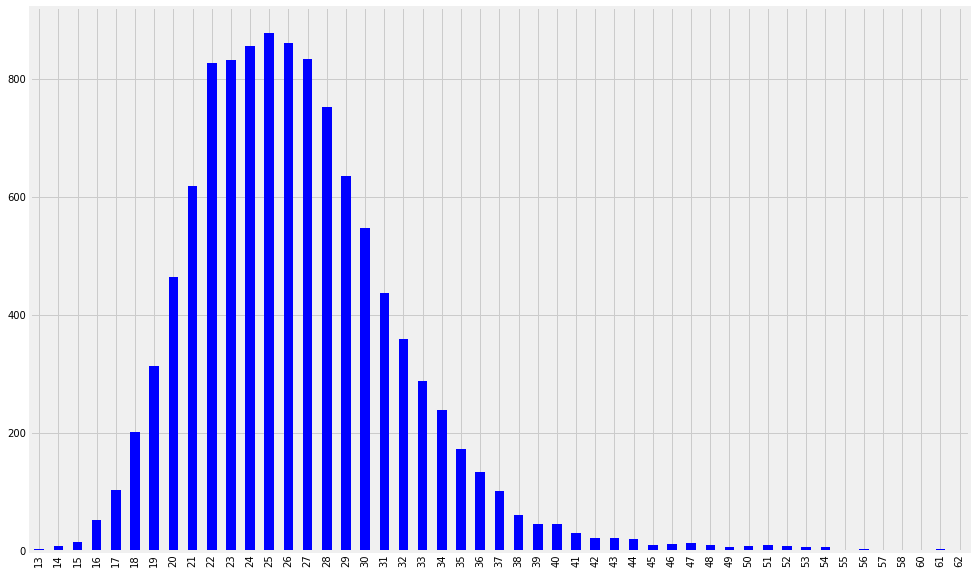

In [14]:
rcParams['figure.figsize'] = 15, 10
df.age.value_counts().sort_index().plot.bar(color='blue')

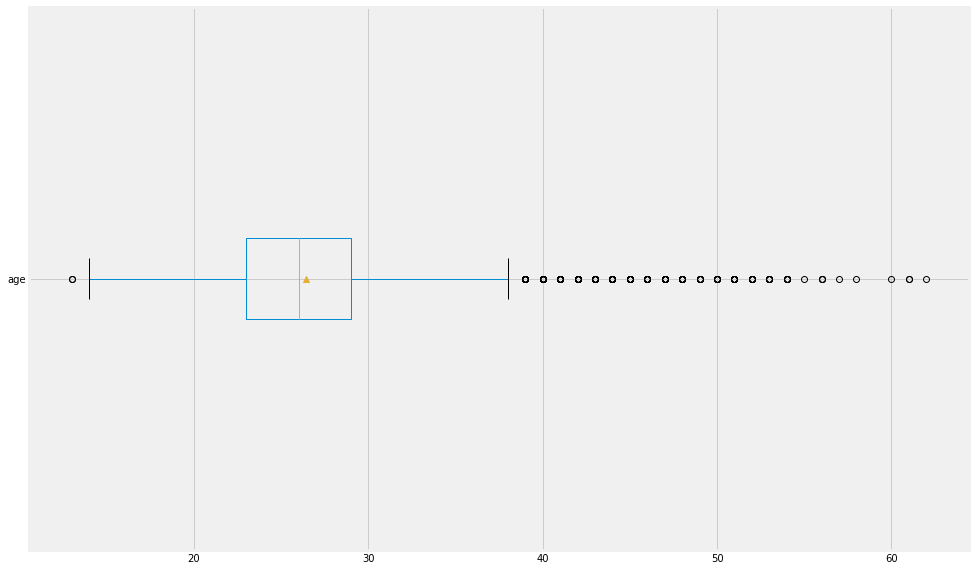

In [15]:
df.boxplot(column='age', showmeans=True, vert=False)

In [16]:
df.age.describe()

count    10858.000000
mean        26.423743
std          5.396171
min         13.000000
25%         23.000000
50%         26.000000
75%         29.000000
max         62.000000
Name: age, dtype: float64

# Is there a difference between the weight and height of male and female athletes? And can we do so with a graph?

### Lets color-code genders to help visualize our data. We'll assign 'yellow' to male athletes and 'green' female ones.

In [17]:
df['color'] = df.apply(lambda x: 'yellow' if x['sex'] == 'male' else 'green', 1)

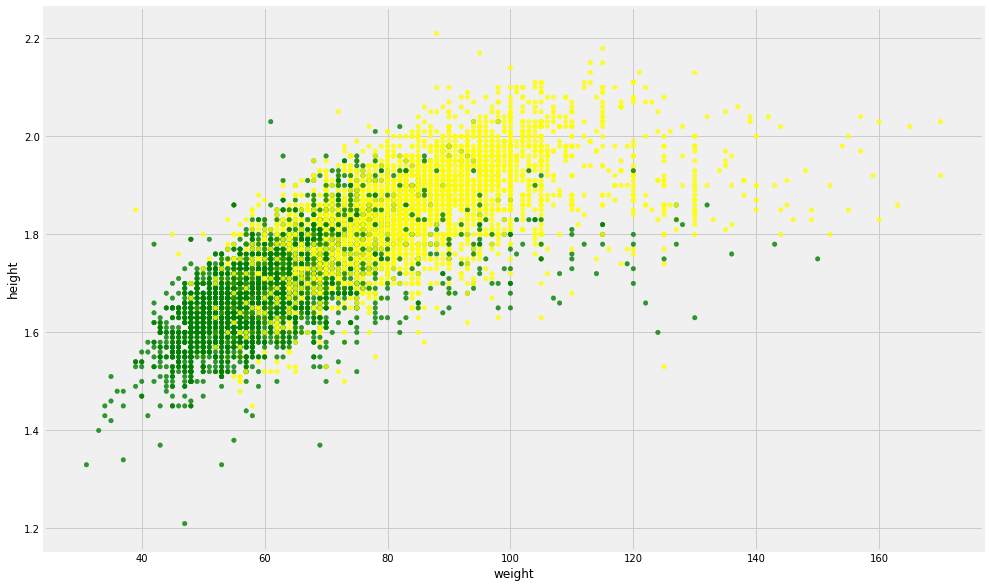

In [18]:
df.plot.scatter(x='weight', y='height', color=df['color'], alpha=.8)

## Lets map the density of weight and height in 3d.

In [19]:
df.groupby(['weight', 'height', 'color'])['id'].count().reset_index().sort_values(by='id')

,weight,height,color,id
0,31.0,1.33,green,1
1822,83.0,1.83,green,1
1814,83.0,1.77,yellow,1
1812,83.0,1.75,yellow,1
1811,83.0,1.74,yellow,1
1810,83.0,1.73,yellow,1
1808,83.0,1.70,yellow,1
1807,83.0,1.68,green,1
1806,83.0,1.67,green,1
1805,83.0,1.63,green,1


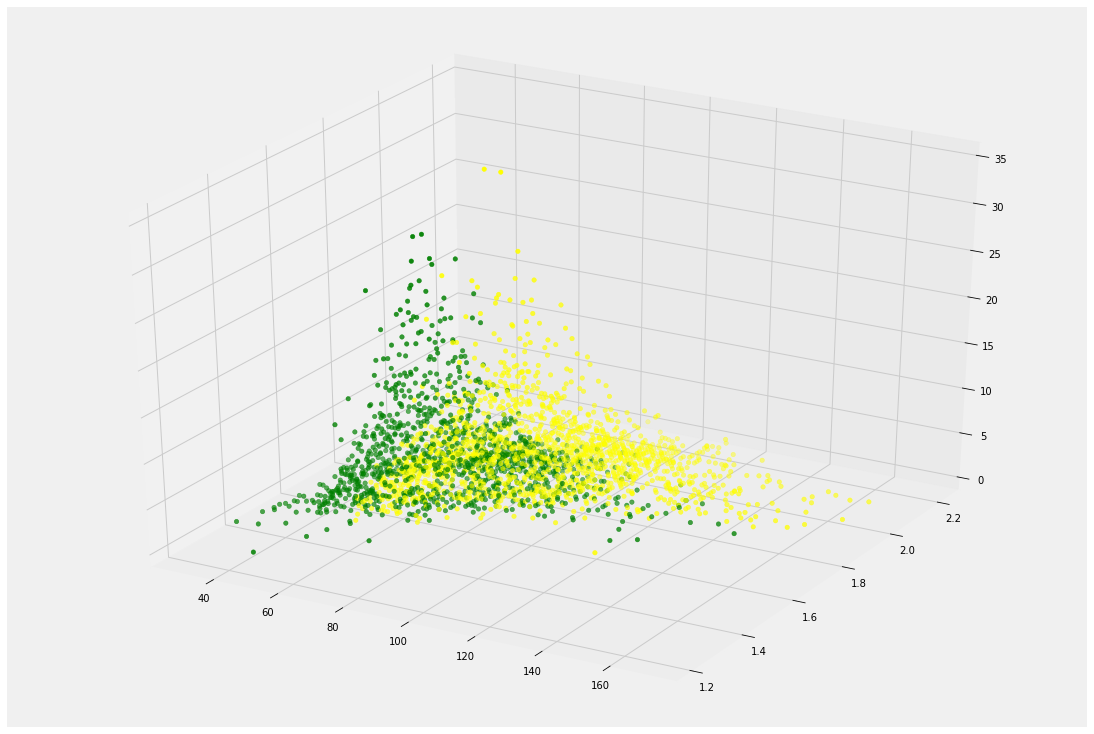

In [20]:
fig = plt.figure()
ax = Axes3D(fig)

df1 = df.groupby(['weight', 'height', 'color'])['id'].count().reset_index()

ax.scatter(df1['weight'], df1['height'], df1['id'], color=df1['color'])
plt.show()

## From looking at the previous two graphs we could speculate that there's a significant difference between the weight and height of of male vs female athletes. How certain are we?

### Lets look at the height first.

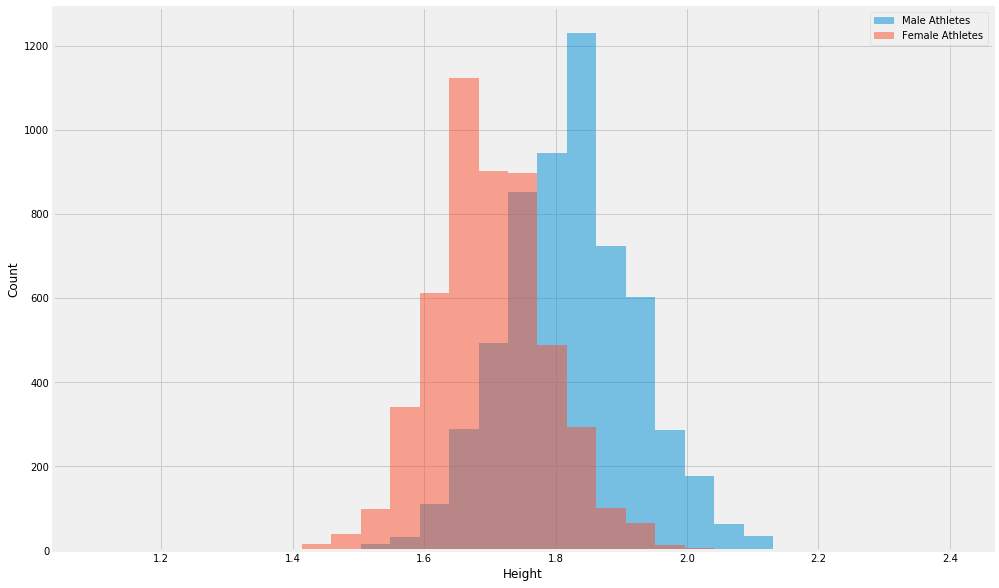

In [21]:
''' 
bins will divide our x axis into 30 intervals of equal length 
and the y axis represents the count of athletes with 
height within that interval.
'''
bins = np.linspace(1.1, 2.4, 30)

#plotting male data
plt.hist(list(df[df['sex'] == 'male']['height'].dropna()), 
         bins, alpha=0.5, label='Male Athletes')

# plotting female data
plt.hist(list(df[df['sex'] == 'female']['height'].dropna()), 
         bins, alpha=0.5, label='Female Athletes')
plt.xlabel('Height')
plt.ylabel('Count')
plt.legend()
plt.show()

### Compute ttest to determine whether or not the difference is significant. If our pvalue is less than .05 we will reject the hypothesis of no significance.

In [22]:
sps.ttest_ind(df[df['sex'] == 'female']['height'], df[df['sex'] == 'male']['height'], equal_var = False)

Ttest_indResult(statistic=-68.442910813484914, pvalue=0.0)

### It seems like we are pretty confident that the difference in height is significant.

## Repeat with weight.

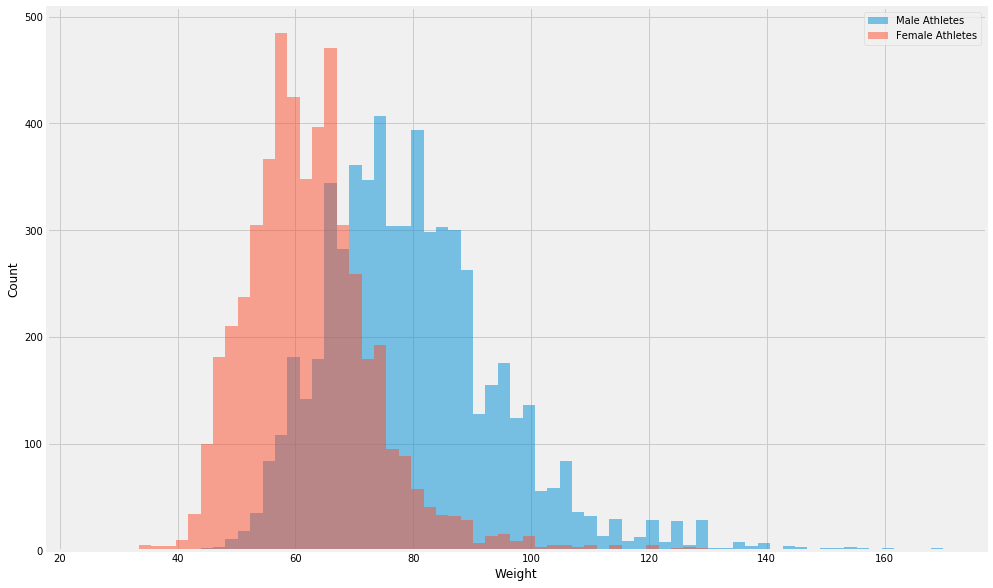

In [23]:
''' 
bins will divide our x axis into 30 intervals of equal length 
and the y axis represents the count of athletes with 
height within that interval.
'''
bins = np.linspace(25, 170, 70)

#plotting male data
plt.hist(list(df[df['sex'] == 'male']['weight'].dropna()), 
         bins, alpha=0.5, label='Male Athletes')

# plotting female data
plt.hist(list(df[df['sex'] == 'female']['weight'].dropna()), 
         bins, alpha=0.5, label='Female Athletes')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.legend()
plt.show()

In [24]:
sps.ttest_ind(df[df['sex'] == 'female']['weight'], df[df['sex'] == 'male']['weight'], equal_var = False)

Ttest_indResult(statistic=-68.404776347044773, pvalue=0.0)

## What's the distribution of gold, silver and bronze medals in each age group.

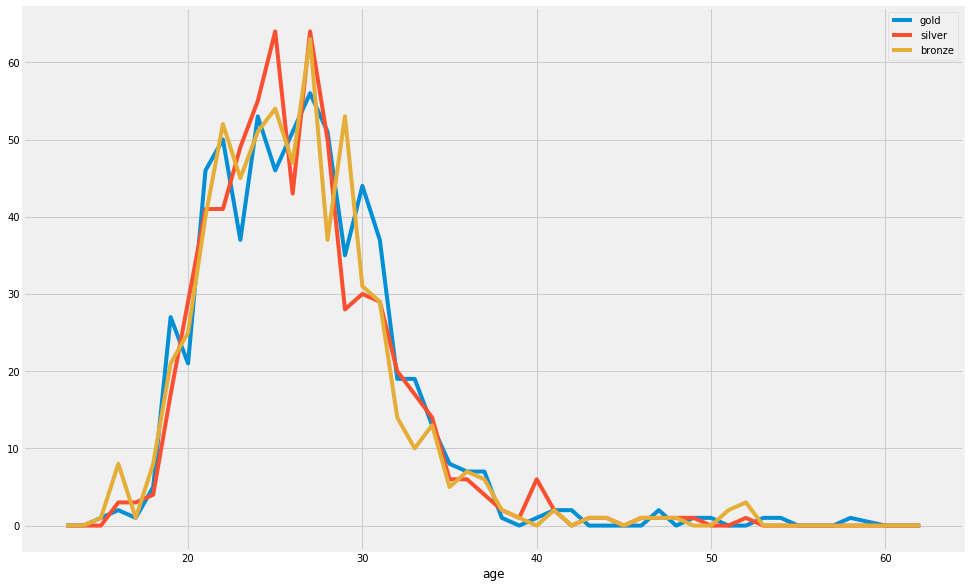

In [25]:
df.groupby(['age'])[['gold', 'silver','bronze']].sum().plot()

In [26]:
sps.ttest_ind(df['gold'], df['bronze'], equal_var = False)

Ttest_indResult(statistic=0.35263126927336486, pvalue=0.72436834033874486)

## What's the distribution of medals among age groups.

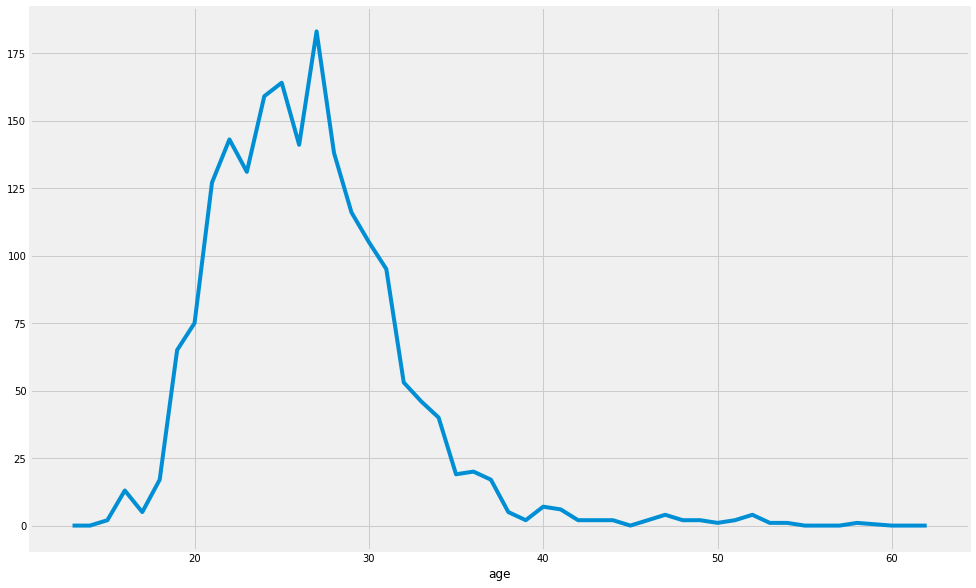

In [27]:
df.groupby('age').apply(lambda x: (x['gold'] + x['silver'] + x['bronze']).sum()).plot()

## What were the top 50 most represented countries in the 2016 olympics.

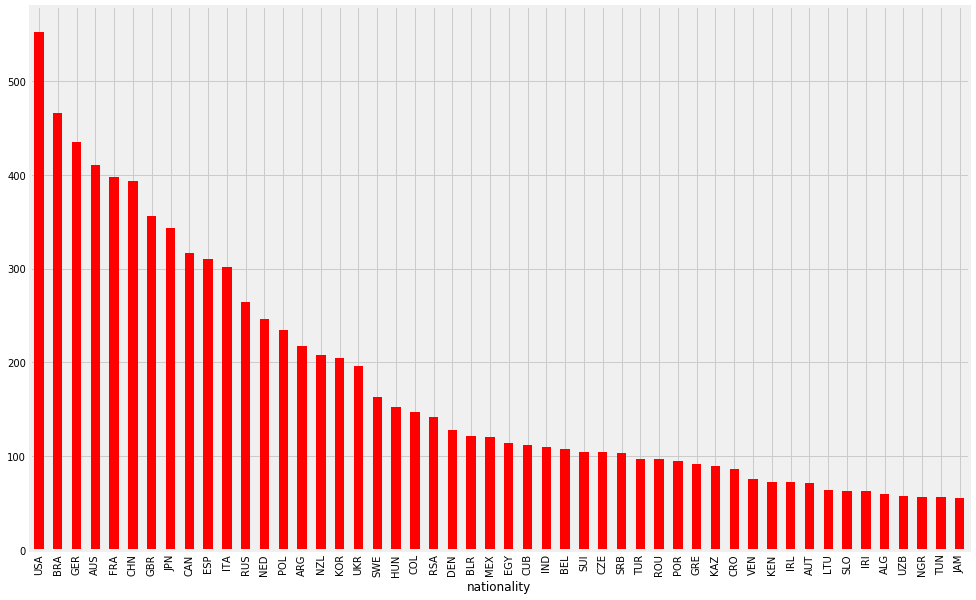

In [28]:
df.groupby('nationality')['id'].count().sort_values(ascending=False)[:50].plot.bar(color='red')